In [18]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
def rle_decode(mask_rle, shape=(768, 768)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T  # Needed to align to RLE direction

def masks_as_image(in_mask_list):
    # Take the individual ship masks and create a single mask array for all ships
    all_masks = np.zeros((768, 768), dtype = np.int16)
    #if isinstance(in_mask_list, list):
    for mask in in_mask_list:
        if isinstance(mask, str):
            all_masks += rle_decode(mask)
    return np.expand_dims(all_masks, -1)

In [5]:
train_csv = pd.read_csv('../../files/train_ship_segmentations_v2.csv')

In [8]:
rle_0 = train_csv.query('ImageId=="00021ddc3.jpg"')['EncodedPixels']
img_0 = masks_as_image(rle_0)

In [49]:
updated_train_csv = train_csv.groupby('ImageId')['EncodedPixels'].apply(list).reset_index()

In [58]:
temp_x = masks_as_image(updated_train_csv[updated_train_csv['ImageId'] == '000155de5.jpg']['EncodedPixels'].values[0])

In [72]:
temp_x = masks_as_image(updated_train_csv[updated_train_csv['ImageId'] == '000194a2d.jpg']['EncodedPixels'].values.tolist()[0])

In [67]:
updated_train_csv

,ImageId,EncodedPixels
0,00003e153.jpg,[nan]
1,0001124c7.jpg,[nan]
2,000155de5.jpg,[264661 17 265429 33 266197 33 266965 33 26773...
3,000194a2d.jpg,[360486 1 361252 4 362019 5 362785 8 363552 10...
4,0001b1832.jpg,[nan]
...,...,...
192551,fffedbb6b.jpg,[nan]
192552,ffff2aa57.jpg,[nan]
192553,ffff6e525.jpg,[nan]
192554,ffffc50b4.jpg,[nan]


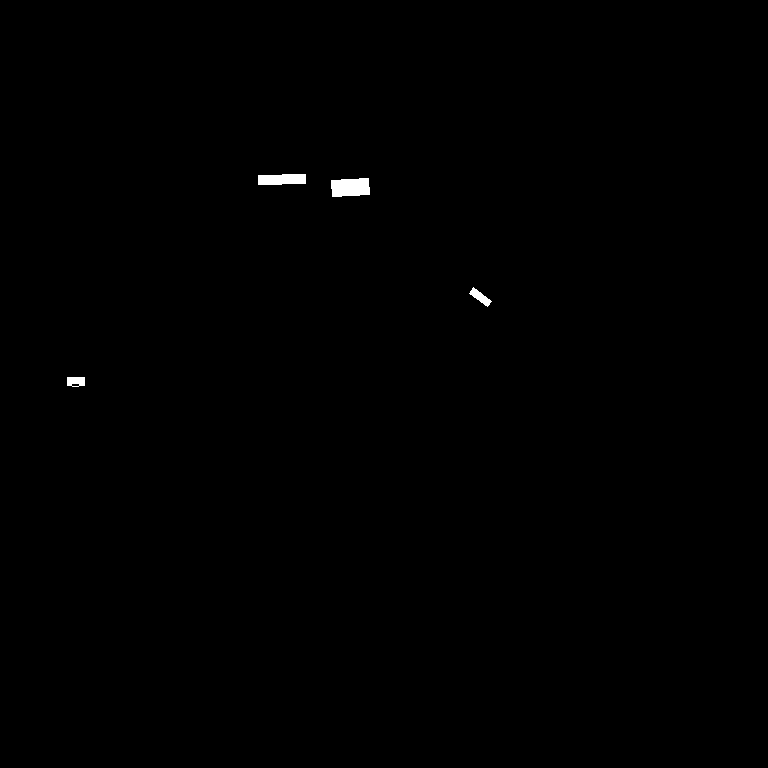

In [74]:
PIL.Image.fromarray(((temp_x * 255).reshape(768, 768)).astype(np.uint8))